<a href="https://colab.research.google.com/github/steffiangel/Projects/blob/main/skin_tone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install opencv-python-headless numpy matplotlib


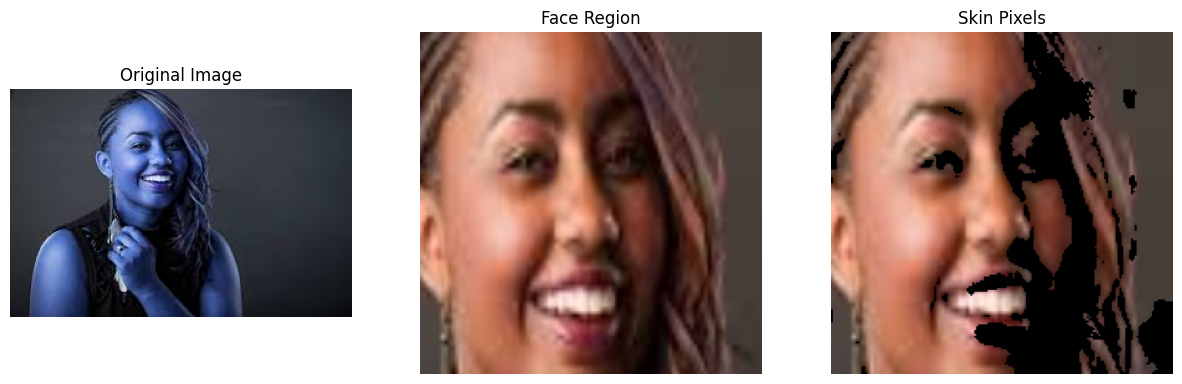

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

def process_image(image_path):

    image = cv2.imread(image_path)
    original_image = image.copy()
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    resized_image = cv2.resize(image, (512, 512))  # Resize to 512x512 for consistency
    normalized_image = resized_image / 255.0       # Normalize pixel values to [0, 1]

    # Step 3: Detect face region
    gray_image = cv2.cvtColor(resized_image, cv2.COLOR_RGB2GRAY)
    faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=8)

    if len(faces) == 0:
        print("No face detected.")
        return None

    # Focus on the first detected face
    x, y, w, h = faces[0]
    face_region = resized_image[y:y+h, x:x+w]

    # Step 4: Extract skin pixels using HSV thresholds
    hsv_face = cv2.cvtColor(face_region, cv2.COLOR_RGB2HSV)

    # Define HSV range for skin tone detection (adjust if needed)
    lower_skin = np.array([0, 20, 70], dtype=np.uint8)
    upper_skin = np.array([20, 255, 255], dtype=np.uint8)

    # Create a mask for skin pixels
    mask = cv2.inRange(hsv_face, lower_skin, upper_skin)
    skin_pixels = cv2.bitwise_and(face_region, face_region, mask=mask)

    # Display the results
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.title("Original Image")
    plt.imshow(original_image)
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.title("Face Region")
    plt.imshow(face_region)
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.title("Skin Pixels")
    plt.imshow(skin_pixels)
    plt.axis("off")

    plt.show()

    return face_region, skin_pixels

# Call the function
face_region, skin_pixels=process_image("/content/hsgafk.jpg")


In [ ]:
import numpy as np
import json
from collections import Counter

def find_most_frequent_color(skin_pixels):
    # Flatten the skin pixels to a 2D array
    skin_pixels_reshaped = skin_pixels.reshape(-1, 3)

    # Remove black pixels (from the mask)
    skin_pixels_filtered = skin_pixels_reshaped[np.all(skin_pixels_reshaped != [0, 0, 0], axis=1)]

    # Convert pixel values to tuples for frequency counting
    pixel_tuples = [tuple(pixel) for pixel in skin_pixels_filtered]

    # Count the frequency of each pixel color
    most_common_pixel = Counter(pixel_tuples).most_common(1)[0][0]  # Get the most frequent color

    return np.array(most_common_pixel)


def map_rgb_to_skin_tone11(rgb_color):
    for tone in skin_tone_data["skin_tones"]:
        min_rgb = np.array(tone["rgb_range"]["min"])
        max_rgb = np.array(tone["rgb_range"]["max"])
        if np.all(rgb_color >= min_rgb) and np.all(rgb_color <= max_rgb):
            return tone["label"], tone["description"],tone['matching_colors']
    return "Unknown", "No matching skin tone found."


with open("tone.json", "r") as f:
    skin_tone_data = json.load(f)
# Example usage
most_frequent_color = find_most_frequent_color(skin_pixels)
print(f"Most Frequent Skin Tone RGB: {most_frequent_color}")

skin_tone_label,sk_des,sk_col = map_rgb_to_skin_tone11(most_frequent_color)
print(f"Predicted Skin Tone: {skin_tone_label}")
print(f"Skin Tone description: {sk_des}")
print(f"Skin Tone suited colors: {sk_col}")

Most Frequent Skin Tone RGB: [74 65 60]
Predicted Skin Tone: Mahogany
Skin Tone description: Dark brown with reddish hues.
Skin Tone suited colors: ['Rich reds', 'Deep purples', 'Vibrant golds', 'Earthy browns', 'Olive green']
